# In Depth - Decision Trees and Forests

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Here we'll explore a class of algorithms based on decision trees.
Decision trees at their root are extremely intuitive.  They
encode a series of "if" and "else" choices, similar to how a person might make a decision.
However, which questions to ask, and how to proceed for each answer is entirely learned from the data.

For example, if you wanted to create a guide to identifying an animal found in nature, you
might ask the following series of questions:

- Is the animal bigger or smaller than a meter long?
    + *bigger*: does the animal have horns?
        - *yes*: are the horns longer than ten centimeters?
        - *no*: is the animal wearing a collar
    + *smaller*: does the animal have two or four legs?
        - *two*: does the animal have wings?
        - *four*: does the animal have a bushy tail?

and so on.  This binary splitting of questions is the essence of a decision tree.

One of the main benefit of tree-based models is that they require little preprocessing of the data.
They can work with variables of different types (continuous and discrete) and are invariant to scaling of the features.

Another benefit is that tree-based models are what is called "nonparametric", which means they don't have a fix set of parameters to learn. Instead, a tree model can become more and more flexible, if given more data.
In other words, the number of free parameters grows with the number of samples and is not fixed, as for example in linear models.


## Decision Tree Classification

Decision tree classification work very similarly, by assigning all points within a leaf the majority class in that leaf:

In [2]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(
    centers=[[0, 0], [1, 1]], random_state=61526, n_samples=100
)

First, let's look at the generated data

In [8]:
pwd # to check where we are (current path)

'/Users/christophenoblanc/Documents/ProjetsPython/DSSP/Day_7'

In [9]:
ls # list files from current directory

01_split.ipynb                          LICENSE
02_trees_and_ensemble.ipynb             README.md
03_mixed_type_preprocessing.ipynb       air_passengers_starting_kit.ipynb
04_parameters_search.ipynb              datasets/
05_model_complexity_gridsearchcv.ipynb  environment.yml
06_learning_curves.ipynb                figures/


In [12]:
# change the current directory
# cd /Users/christophenoblanc/Documents/ProjetsPython/DSSP/Day_7 

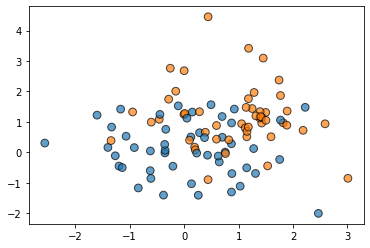

In [13]:
# import the figures (see the sub-folder figures to get nice plots)
from figures import plot_2d_separator, cm2

_ = plt.scatter(
    X[:, 0], X[:, 1], c=y, cmap=cm2,
    s=60, alpha=.7, edgecolor='k'
)

# 2 features with 2 classes

We can learn a set of binary rule using a portion of the data. Using the rules learned, we will predict on the testing data.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
) # by default 

clf = DecisionTreeClassifier(max_depth=10) # use 'Gini', but similar results as emtropy
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6

We can plot the decision boundaries found using the training data.

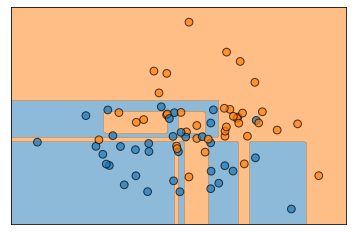

In [17]:
plot_2d_separator(clf, X, fill=True)
_ = plt.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm2,
    s=60, alpha=.7, edgecolor='k'
)

# Ici, on plot les points de Train

Similarly, we get the following classification on the testing set.

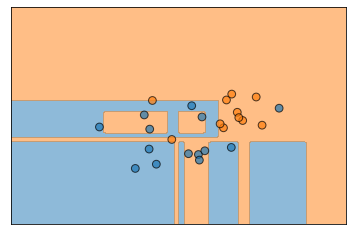

In [19]:
plot_2d_separator(clf, X, fill=True)
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm2,
    s=60, alpha=.7, edgecolor='k'
)

# Ici, on plot les points de Test.
# on voit que certains points sont mal classés.
# D'où l'accuracy que de 0.6

There are many parameter that control the complexity of a tree, but the one that might be easiest to understand is the maximum depth. This limits how finely the tree can partition the input space, or how many "if-else" questions can be asked before deciding which class a sample lies in.

This parameter is important to tune for trees and tree-based models. The interactive plot below shows how underfit and overfit looks like for this model. Having a ``max_depth`` of 1 is clearly an underfit model, while a depth of 7 or 8 clearly overfits. The maximum depth a tree can be grown at for this dataset is 8, at which point each leave only contains samples from a single class. This is known as all leaves being "pure."

In the interactive plot below, the regions are assigned blue and red colors to indicate the predicted class for that region. The shade of the color indicates the predicted probability for that class (darker = higher probability), while yellow regions indicate an equal predicted probability for either class.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
     <li> Modify the depth of the tree and see how the partitioning evolves. </li>
     <li>What can you say about under- and over-fitting of the tree model?</li>
     <li>How would you choose the best depth?</li>
     </ul>
</div>

In [20]:
from figures import plot_tree_interactive
plot_tree_interactive()

interactive(children=(IntSlider(value=0, description='max_depth', max=8), Output()), _dom_classes=('widget-int…

## Decision Tree Regression

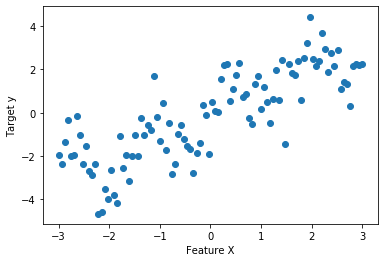

In [25]:
# On génè notre jeu de données
# on génère des points avec une feature X (sinus + bruit)
rnd = np.random.RandomState(42)
x = np.linspace(-3, 3, 100)
y_no_noise = np.sin(4 * x) + x
y = y_no_noise + rnd.normal(size=len(x))
X = x.reshape(-1, 1) # = à X=x[:,np.newaxis]

plt.figure()
plt.xlabel('Feature X')
plt.ylabel('Target y')
_ = plt.scatter(X, y)

In [38]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=4)
reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

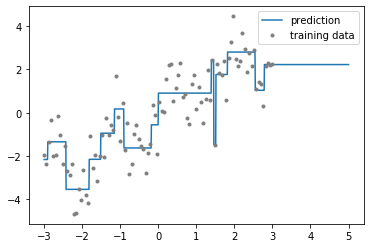

In [41]:
X_test = np.linspace(-3, 5, 1000).reshape((-1, 1))
y_test = reg.predict(X_test)

plt.figure()
plt.plot(X_test.ravel(), y_test, color='tab:blue', label="prediction")
plt.plot(X.ravel(), y, 'C7.', label="training data")
_ = plt.legend(loc="best")

A single decision tree allows us to estimate the signal in a non-parametric way,
but clearly has some issues.  In some regions, the model shows high bias and
under-fits the data.
(seen in the long flat lines which don't follow the contours of the data),
while in other regions the model shows high variance and over-fits the data
(reflected in the narrow spikes which are influenced by noise in single points).

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Take the above example and repeat the training/testing by changing depth of the tree.
      </li>
      <li>
      What can you conclude?
      </li>
    </ul>
</div>

## Bagging classifiers

We saw that by increasing the depth of the tree, we are going to get an over-fitted model. A way to bypass the choice of a specific depth it to combine several trees together.

Let's start by training several trees on slightly different data. The slightly different dataset could be generated by randomly sampling with replacement. In statistics, this called a boostrap sample. We will use the iris dataset to create such ensemble and ensure that we have some data for training and some left out data for testing.

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Before to train several decision trees, we will run a single tree. However, instead to train this tree on `X_train`, we want to train it on a bootstrap sample. You can use the `np.random.choice` function sample with replacement some index. You will need to create a sample_weight vector and pass it to the `fit` method of the `DecisionTreeClassifier`. We provide the `generate_sample_weight` function which will generate the `sample_weight` array.

In [48]:
def bootstrap_idx(X):
    indices = np.random.choice(
        np.arange(X.shape[0]), size=X.shape[0], replace=True
    )
    return indices

In [43]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [44]:
X.shape # 4 features, 150 fleurs et 4 classes (4 espèces)

(150, 4)

In [45]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [46]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [51]:
# Cela retourne un nouveau tableau avec les échantillons tirés aléatoirement
def bootstrap_idx(X):
    indices = np.random.choice(
        np.arange(X.shape[0]), size=X.shape[0], replace=True
    )
    return indices

In [52]:
bootstrap_idx(X_train) # Re-échantillonnage des données

array([ 13,  51, 107,  12,   6,  43,  46,  89,  96,   2,  75,   5,  99,
         4,  54,  50,  10,  95,   8,  38, 101,  63,  76,  26, 103,  28,
        61,   2,  69,  41,  77,  70, 101,  71, 101,  92,  83, 101,  11,
        56,  88,  56,  50,  69,  94,  53,  97,  35,  77,  90,   4, 111,
        59,  70,  89, 104,  51,  94,  18,  27,  54, 105,  76,  97,  74,
        36,  40, 100,  99,  39,  79,  33,  95,  18,   3,  61,  71,   8,
        32,  25,  87,  42,  60,   0,  85,  79,  50,  52,  92,  69,  54,
        83,  52,  12,  15,  87,  87,   3,  76,  26,  52, 108,  27,  82,
         1,   0, 108,  83,  88,  54,  98,  98])

In [53]:
from collections import Counter
Counter(bootstrap_idx(X_train))

Counter({100: 4,
         40: 2,
         44: 1,
         16: 1,
         92: 3,
         59: 2,
         96: 1,
         38: 1,
         64: 3,
         70: 3,
         48: 2,
         6: 2,
         93: 2,
         17: 2,
         8: 2,
         22: 1,
         67: 2,
         32: 2,
         42: 2,
         3: 2,
         45: 2,
         68: 2,
         55: 2,
         101: 3,
         7: 1,
         13: 1,
         36: 3,
         88: 4,
         1: 3,
         30: 2,
         0: 2,
         76: 2,
         77: 1,
         2: 1,
         66: 2,
         85: 1,
         12: 1,
         105: 2,
         31: 2,
         109: 1,
         60: 1,
         53: 1,
         98: 2,
         110: 2,
         72: 1,
         14: 1,
         79: 2,
         102: 2,
         35: 3,
         26: 1,
         49: 2,
         74: 1,
         25: 1,
         56: 1,
         19: 1,
         9: 1,
         43: 1,
         75: 2,
         34: 1,
         89: 1,
         33: 1,
         4: 1,
         78

In [54]:
def bootstrap_sample(X, y):
    indices = bootstrap_idx(X)
    return X[indices], y[indices]

In [55]:
X_train_bootstrap, y_train_bootstrap = bootstrap_sample(X_train, y_train)

In [56]:
print(f'Classes distribution in the original data: {Counter(y_train)}') # compte les valeurs dans l'origine
# Après re-sampling
print(f'Classes distribution in the bootstrap: {Counter(y_train_bootstrap)}') # compte les valeurs dans le nouveau

Classes distribution in the original data: Counter({1: 38, 2: 37, 0: 37})
Classes distribution in the bootstrap: Counter({1: 42, 2: 35, 0: 35})


<div class="alert alert-success">
    <b>EXERCISE: Create a bagging classifier</b>:
    <br>
    A bagging classifier will train several decision tree classifiers, each of them on a different bootstrap sample.
     <ul>
      <li>
      Create several `DecisionTreeClassifier` and store them in a Python list;
      </li>
      <li>
      Loop over these trees and `fit` them by generating a bootstrap sample using `bootstrap_sample` function;
      </li>
      <li>
      To predict with this ensemble of trees on new data (testing set), you can provide the same set to each tree and call the `predict` method. Aggregate all predictions in a NumPy array;
      </li>
      <li>
      Once the predictions available, you need to provide a single prediction: you can retain the class which was the most predicted which is called a majority vote;
      </li>
      <li>
      Finally, check the accuracy of your model.
      </li>
    </ul>
</div>

In [123]:
MaxTrees=100
Forest=[]
for x in range(MaxTrees):
    X_train_bootstrap, y_train_bootstrap = bootstrap_sample(X_train, y_train)
    tree= DecisionTreeClassifier(max_depth=None)
    tree.fit(X_train_bootstrap, y_train_bootstrap)
    Forest.append(tree)
    

In [124]:
# Get predictions for each of the generated trees
liste_Predictions=[]
for tree in Forest:
    liste_Predictions.append(tree.predict(X_test))

# Transformation de la liste contenant des arrays, en matrice 2D
Predictions=np.stack(liste_Predictions,axis=1) # Concatenation sur les colonnes
# ou on peut faire aussi :
Predictions=np.vstack(liste_Predictions).T # Transpose pour avoir les 10 trees en colonnes et les samples an ligne
Predictions.shape
# 10 colonnes correspondant aux predictions de mes 10 arbres

(38, 100)

In [125]:
# Trouver maintenant pour chaque Test record, la classe la plus fréquente parmis mes 10 arbres
# Selection de la classe la plus fréquente parmis les 10 arbres : vote majoritaire
Classe_for_Test=[]
for pred in Predictions:
    count=Counter(pred)
    #Classe_for_Test.append(count)
    Classe_for_Test.append(max(count,key=count.get))
    #print(max(count,key=count.get))

#Classe_for_Test=np.unique(Predictions,return_counts=True)
#Classe_for_Test

In [126]:
# Autre façon de faire plus efficace :
from collections import Counter
Classe_for_Test=[]
for pred in Predictions:
    count=Counter(pred)
    class_idx,_ = count.most_common(n=1)[0] # Récupère le plus commun
    Classe_for_Test.append(class_idx)

In [127]:
(Classe_for_Test == y_test).mean()

0.9210526315789473

<div class="alert alert-success">
    <b>EXERCISE: using scikit-learn</b>:
    <br>
    After implementing your own bagging classifier, use a `BaggingClassifier` from scikit-learn to fit the above data.
</div>

In [130]:
from sklearn.ensemble import BaggingClassifier

base_estimator=DecisionTreeClassifier(max_depth=None)
trees=BaggingClassifier(base_estimator=base_estimator,n_estimators=100)
trees.fit(X_train,y_train)

trees.score(X_test,y_test)

0.9210526315789473

## Random Forests

A very famous classifier is the random forest classifier. It is similar to the bagging classifier. In addition of the bootstrap, the random forest will use a subset of features (selected randomly) to find the best split.

<div class="alert alert-success">
    <b>EXERCISE: Create a random forest classifier</b>:
    <br>
    Use your previous code which was generated several `DecisionTreeClassifier`. Check the list of the option of this classifier and modify one of the parameters such that only the $\sqrt{F}$ features are used for the splitting. $F$ represents the number of features in the dataset.
</div>

<div class="alert alert-success">
    <b>EXERCISE: using scikit-learn</b>:
    <br>
    After implementing your own random forest classifier, use a `RandomForestClassifier` from scikit-learn to fit the above data.
</div>

In [146]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train).score(X_test,y_test)

0.9210526315789473

In [147]:
from figures import plot_forest_interactive
plot_forest_interactive() # 100 arbres mais très mimités

interactive(children=(IntSlider(value=0, description='max_depth', max=8), Output()), _dom_classes=('widget-int…

## Another option: Gradient Boosting

Another Ensemble method that can be useful is *Boosting*: here, rather than
looking at 200 (say) parallel estimators, we construct a chain of 200 estimators
which iteratively refine the results of the previous estimator.
The idea is that by sequentially applying very fast, simple models, we can get a
total model error which is better than any of the individual pieces.

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=.2)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9210526315789473


<div class="alert alert-success">
    <b>ACCELERATE GRADIENT BOOSTING</b>:
    <ul>
        <li>Which solution would you use to accelerate the training speed of gradient boosting algorithm.</li>
    </ul>
</div>

Scikit-learn provides `HistGradientBoostingClassifier` which is an approximate gradient boosting algorithm similar to `lightgbm` and `xgboost`.

In [149]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9210526315789473


In [ ]:
# projet de Microsoft : lightgbm 
# projet de ... : xgboost